Step1: generate syntetic data

In [9]:
!pip3 install torch torchvision

     |████████████████████████████████| 147.1 MB 45 kB/s s eta 0:00:01
     |████████████████████████████████| 1.2 MB 44.2 MB/s eta 0:00:01


In [33]:
!pip3 install -U d2l

     |████████████████████████████████| 82 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 15.1 MB 19.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.5 MB 8.0 MB/s eta 0:00:01


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:
      Successfully uninstalled pandas-1.2.4
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [34]:
import numpy as np
import torch
import random
from d2l import torch as d2l

In [45]:
def synthetic_data(w,b, num_example, num_features):
    X = torch.normal(0,1,(num_example,num_features))
    y = torch.matmul(X, w)+ b
    y += torch.normal(0,0.01,y.shape)
    return X, y

w = torch.tensor([1,3.2,-2])
b = 5

X, y = synthetic_data(w,b,20,len(w))

In [46]:
y

tensor([ 0.6356, -2.8614,  1.1334, -0.8141, 11.6699,  0.0759,  3.7058,  1.5131,
         6.8020,  5.4687,  0.8305, -0.2058,  7.1207,  4.5225,  7.6813, -0.8146,
        11.8580,  5.5119,  5.4445,  7.1648])

In [47]:
y = y.reshape((-1,1))
y

tensor([[ 0.6356],
        [-2.8614],
        [ 1.1334],
        [-0.8141],
        [11.6699],
        [ 0.0759],
        [ 3.7058],
        [ 1.5131],
        [ 6.8020],
        [ 5.4687],
        [ 0.8305],
        [-0.2058],
        [ 7.1207],
        [ 4.5225],
        [ 7.6813],
        [-0.8146],
        [11.8580],
        [ 5.5119],
        [ 5.4445],
        [ 7.1648]])

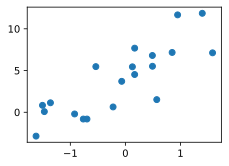

In [48]:
d2l.set_figsize()
d2l.plt.scatter(X[:,(1)].detach().numpy(),y.detach().numpy())

Step2: create iterator for data

In [53]:
def iterbatches(batch_size, X, y):
    indices = list(range(len(y)))
    random.shuffle(indices)
    for i in range(0,len(y),batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, len(y))])
        yield X[batch_indices], y[batch_indices]

In [54]:
for X_b, y_b in iterbatches(10,X,y):
    print(X_b, y_b)
    break

tensor([[-0.2045, -0.6975,  1.6867],
        [ 1.2631, -0.0666,  1.1691],
        [ 0.1738,  1.3966, -1.1035],
        [-0.1809, -1.4718,  0.0163],
        [ 0.2312,  0.1685,  0.6289],
        [ 1.1053,  0.8492,  0.8181],
        [-1.3085, -0.2233,  1.1731],
        [ 1.3067, -0.7644,  2.3335],
        [-0.6283,  0.4921,  0.2113],
        [-1.2144,  1.5834,  0.8706]]) tensor([[-0.8141],
        [ 3.7058],
        [11.8580],
        [ 0.0759],
        [ 4.5225],
        [ 7.1648],
        [ 0.6356],
        [-0.8146],
        [ 5.5119],
        [ 7.1207]])


Step3: define model, intial paramters and loss function

In [85]:
W = torch.normal(0,1,(3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [57]:
def linreg(X,w,b):
    return torch.matmul(X, w)+b

In [58]:
def squared_loss(y_hat, y):
    return ((y_hat-y.reshape(y.shape))**2)/2

In [82]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

Step4: train the network

In [87]:
lr = 0.03
epochs = 5

for epoch in range(epochs):
    for X_b,y_b in iterbatches(5,X,y):
        loss = squared_loss(linreg(X_b,W,b),y_b)
        loss.sum().backward()
        sgd([W,b], lr, 5)
    with torch.no_grad():
        print(f'epoch {epoch} loss {float(squared_loss(linreg(X,W,b),y).mean()):f}')

epoch 0 loss 4.921418
epoch 1 loss 4.077487
epoch 2 loss 3.379934
epoch 3 loss 2.804749
epoch 4 loss 2.329123
